In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

/home/batu/anaconda3/envs/tradebot/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6338 entries, 1995-01-03 to 2020-03-05
Data columns (total 4 columns):
PG      6338 non-null float64
MSFT    6338 non-null float64
F       6338 non-null float64
GE      6338 non-null float64
dtypes: float64(4)
memory usage: 247.6 KB


In [5]:
mydata.iloc[0]

PG      6.362394
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

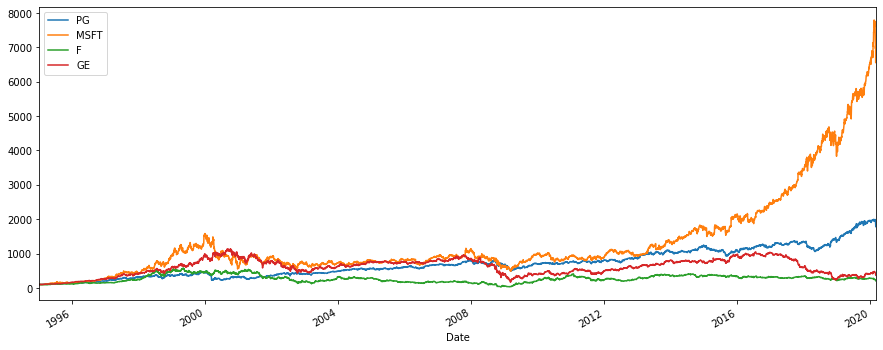

In [6]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))

In [7]:
returns = (mydata / mydata.shift(1)) - 1

In [8]:
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [9]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [10]:
np.dot(returns,weights)

array([        nan,  0.00653983, -0.00922988, ..., -0.03023196,
        0.02812444, -0.04390554])

In [11]:
annual_returns = returns.mean() * 250

In [13]:
np.dot(annual_returns,weights)

0.1398317595910973